In [99]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
from datetime import timedelta
warnings.filterwarnings("ignore")
import math
import csv, io
import numpy as np
import scipy
import matplotlib.pyplot as plt
import nltk, string
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from nltk.stem.snowball import SnowballStemmer


In [21]:
!pip install textblob

     -------------------------------------- 626.3/626.3 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.6 MB/s eta 0:00:00
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [57]:
# Load the dataset
data = pd.read_csv('archive (3)/LokSabha_Election_2024_Tweets.csv')


In [58]:
data.head()

,link,text,date,No_of_likes,No_of_comments
0,https://twitter.com/Politics_2022_/status/1739...,South India 2024 Loksabha Opinion Poll 132 sea...,"Dec 25, 2023 · 12:05 PM UTC",324,27
1,https://twitter.com/LokmatTimes_ngp/status/173...,"Veteran actor Nana Patekar says, ""There is no ...","Dec 25, 2023 · 1:00 PM UTC",0,0
2,https://twitter.com/Politics_2022_/status/1739...,South India BJP 2019 Loksabha Karnataka 25 Tel...,"Dec 25, 2023 · 12:21 PM UTC",142,18
3,https://twitter.com/rohanayak/status/173926994...,Issh baar 357 seats in Loksabha election.,"Dec 25, 2023 · 1:00 PM UTC",0,0
4,https://twitter.com/BellamSwathi/status/173919...,Total number of times MMS won his own lok sabh...,"Dec 25, 2023 · 8:19 AM UTC",589,80


In [54]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dathr\AppData\Roaming\nltk_data...


True

In [55]:
stemmer = SnowballStemmer('english')
vectorizer = TfidfVectorizer(use_idf = True, tokenizer = nltk.word_tokenize,stop_words='english', smooth_idf = True)
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)
sid = SentimentIntensityAnalyzer()
stopw = set(stopwords.words('english')) QA, PROD, UAT, 

In [56]:
contraction = {"ain't": "is not", "aren't": "are not","can't": "cannot", 
                   "can't've": "cannot have", "'cause": "because", "could've": "could have", 
                   "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
                   "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                   "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
                   "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
                   "he'll've": "he he will have", "he's": "he is", "how'd": "how did", 
                   "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
                   "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                   "I'll've": "I will have","I'm": "I am", "I've": "I have", 
                   "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                   "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                   "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                   "it'll": "it will", "it'll've": "it will have","it's": "it is", 
                   "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                   "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                   "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
                   "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have", "bharatiya janata party" : "bjp",
                   "inc" : "congress","@narendramodi":"modi", "pappu":"rahul gandhi","gandhi":"rahul gandhi", "@rahulgandhi":"Rahul Gandhi"}

def clean(text):
    text = text.lower()
    temp = ""
    for i in text.split():
        if i not in stopw:
            try:
                temp+=contraction[i]+' '
            except:
                temp+= i+' '
    text = temp.strip()
    text = re.sub(r'http\S+','', text)
    text = text.lower().translate(remove_punctuation_map)
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = text.replace("bhartiya janata party",'bjp')
    text = text.replace("indian national congress", 'congress')
    text = text.replace("aam aadmi party", 'aap')
    text = text.replace("narendra modi", 'modi')
    text = text.replace("rahulgandhi", 'rahul gandhi')
    temp=''
    for i in text:
        if i.isdigit()==False:
            temp+=i
    text = temp
    text = text.split()
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)
    return text.strip()

In [67]:
preprocessed = []
for i in data["text"]:
    preprocessed.append(clean(str(i).strip().lower()))
preprocessed[:5]

['south india loksabha opinion poll seat cvoter india bjp oth india poll vote survey bjp overestim bjp win seat either karnataka mayb telangana other includ ysr tdp aiadmk brs vote',
 'veteran actor nana patekar say there altern bjp easili get seat lok sabha elect due outstand work nanagpatekar nanapatekar bjpgovern elect',
 'south india bjp loksabha karnataka telangana andhra pradesh tamil nadu kerala seat seat congress drag rest state irrelev bjp apart ka tg anyth achiev bjp complain that',
 'issh baar seat loksabha elect',
 'total number time mms lok sabha seat zero henc ramu kaka gandi modi lost elect two general elect highest number mps last year highest approv rate amongst world leader henc strongest pm']

In [69]:
data.insert(2,"processed_tweet",preprocessed,True)
data.head()

,link,text,processed_tweet,date,No_of_likes,No_of_comments
0,https://twitter.com/Politics_2022_/status/1739...,South India 2024 Loksabha Opinion Poll 132 sea...,south india loksabha opinion poll seat cvoter ...,"Dec 25, 2023 · 12:05 PM UTC",324,27
1,https://twitter.com/LokmatTimes_ngp/status/173...,"Veteran actor Nana Patekar says, ""There is no ...",veteran actor nana patekar say there altern bj...,"Dec 25, 2023 · 1:00 PM UTC",0,0
2,https://twitter.com/Politics_2022_/status/1739...,South India BJP 2019 Loksabha Karnataka 25 Tel...,south india bjp loksabha karnataka telangana a...,"Dec 25, 2023 · 12:21 PM UTC",142,18
3,https://twitter.com/rohanayak/status/173926994...,Issh baar 357 seats in Loksabha election.,issh baar seat loksabha elect,"Dec 25, 2023 · 1:00 PM UTC",0,0
4,https://twitter.com/BellamSwathi/status/173919...,Total number of times MMS won his own lok sabh...,total number time mms lok sabha seat zero henc...,"Dec 25, 2023 · 8:19 AM UTC",589,80


In [41]:
data.dtypes

link              object
text              object
date              object
No_of_likes        int64
No_of_comments     int64
dtype: object

In [70]:
compare = ["vijay rajnath ravishankar  yudhvirsethi patra narendra modi vijayvargiyah sadhvi bjp arun manoj reddy sushma rsprasad taneja maneka udhavthackeray gautam gambhir piyush goyal nitin gadkari gadkariji rss singh vasundhraraje bjpbengal smriti kailash gautamgambhir swamy udhav sushmaswaraj sadhvi pragya vasundhra sambitpatra shivraj arunjaitley manohar parikar subramanianswamy naredra modi manojtiwari amit modiji yogi adityanath sushma swaraj nitin vivekreddy shivrajsinghchouhan vijayrupani amit shah narendramodi pragya arun jaitley thackeray sunny deol bharatiya janata party kailashvijayvargiyah adityanath yogi jaitley piyush gadkari sambit smritiirani rajnathsingh irani swaraj gautam parikar nirmala bhartiya janta party ram nirmala sitaraman modi shivrajsingh nititngadkari manohar rammadhav smriti irani yedyurappa madhav gambhir narendra rajnath singh subrmanian goyal chouhan amitshah sitaraman manoharparikar ravishankar prasad rupani rao shah ravishankarprasad narsimha vivek vijay rupani prasad bhartiya janata party giriraj chowkidar",
          "congress rahul gandhi sonia pappu manish tiwari mani shankar aiyar amrinder singh navjot sidhu pilot sachin jyotiraditya scindia ashok gehlot ajay makhan makhen chidambaram raj babbar sheila dikshit kamal nath digvijay singh sanjay kaul ashok chavan prithviraj randeep surjaewala hooda deepender kapil sibal manmohan ahmed patil natwar gaurav vallabh pawan khera taneja reddy george antony venugopal rao raman gogoi lalu prasad yadav akhilesh ravat urmila milind deora siddaramiah shivkumar dks sandeep ashok tanwar prakash jha"]
documents = data["processed_tweet"]
party = []
for i in documents:
    l = len(i.split())
    freq_bjp = 0
    freq_cong = 0
    for j in compare[0].split():
        freq_bjp+=i.count(j.strip())
    for j in compare[1].split():
        freq_cong+=i.count(j.strip())
    #print(freq_cong, freq_bjp)
    if freq_bjp>freq_cong:
        party.append("BJP")
    elif freq_cong>freq_bjp:
        party.append("Congress")
    else:
        party.append("Other")

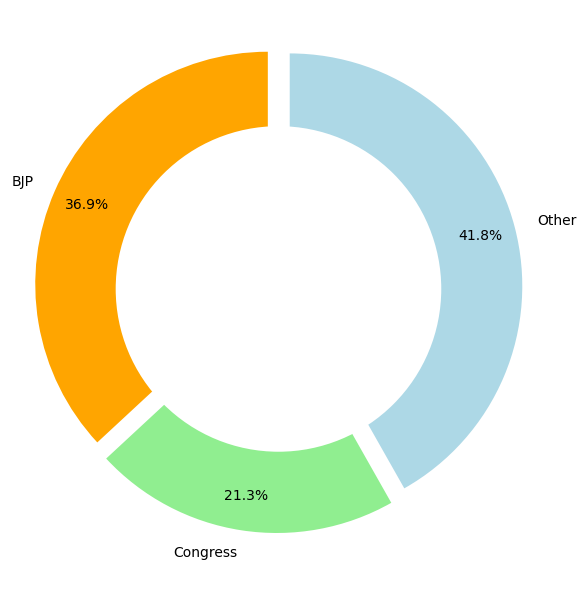

In [74]:
plt.rcParams["figure.figsize"] = [6,6]
labels = ["BJP","Congress","Other"]
count = [party.count("BJP"),party.count("Congress"),party.count("Other")]
explode = (0.05,0.05,0.05)
patches, texts,autotexts = plt.pie(count,labels=labels, explode = explode,colors = ["orange","lightgreen","lightblue"], startangle=90, autopct='%1.1f%%',shadow = False, pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()

In [76]:
sentiment = {"Positive":[], "Negative" :[], "Neutral":[], "Compound":[]}
for i in data["processed_tweet"]:
    sentiment["Positive"].append(sid.polarity_scores(i)['pos'])
    sentiment["Negative"].append(sid.polarity_scores(i)['neg'])
    sentiment["Neutral"].append(sid.polarity_scores(i)['neu'])
    sentiment["Compound"].append(sid.polarity_scores(i)['compound'])

In [79]:
data.insert(6,"Neutral",sentiment['Neutral'],True)
data.insert(7,"Positive",sentiment['Positive'],True)
data.insert(8,"Negative",sentiment['Negative'],True)
data.insert(9,"Compound",sentiment['Compound'],True)

In [81]:
data.head()

,link,text,processed_tweet,date,No_of_likes,No_of_comments,Neutral,Positive,Negative,Compound
0,https://twitter.com/Politics_2022_/status/1739...,South India 2024 Loksabha Opinion Poll 132 sea...,south india loksabha opinion poll seat cvoter ...,"Dec 25, 2023 · 12:05 PM UTC",324,27,0.884,0.116,0.000,0.5859
1,https://twitter.com/LokmatTimes_ngp/status/173...,"Veteran actor Nana Patekar says, ""There is no ...",veteran actor nana patekar say there altern bj...,"Dec 25, 2023 · 1:00 PM UTC",0,0,1.000,0.000,0.000,0.0000
2,https://twitter.com/Politics_2022_/status/1739...,South India BJP 2019 Loksabha Karnataka 25 Tel...,south india bjp loksabha karnataka telangana a...,"Dec 25, 2023 · 12:21 PM UTC",142,18,0.850,0.000,0.150,-0.5267
3,https://twitter.com/rohanayak/status/173926994...,Issh baar 357 seats in Loksabha election.,issh baar seat loksabha elect,"Dec 25, 2023 · 1:00 PM UTC",0,0,1.000,0.000,0.000,0.0000
4,https://twitter.com/BellamSwathi/status/173919...,Total number of times MMS won his own lok sabh...,total number time mms lok sabha seat zero henc...,"Dec 25, 2023 · 8:19 AM UTC",589,80,0.782,0.154,0.064,0.2960


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have your data stored in a DataFrame called data
# Replace 'processed_tweet' and 'PositiveScore' with the actual column names in your DataFrame

# Count tweets with 'bjp' and positive score > 0.4
bjp_count = data[(data['processed_tweet'].str.contains('bjp', case=False)) & (data['Positive'] > 0.2)].shape[0]

# Count tweets with 'congress' and positive score > 0.4
congress_count = data[(data['processed_tweet'].str.contains('congress', case=False)) & (data['Positive'] > 0.2)].shape[0]

# Count tweets with 'others' and positive score > 0.4
others_count = data[(data['processed_tweet'].str.contains('other', case=False)) & (data['Positive'] > 0.2)].shape[0]

In [96]:
bjp_count

30

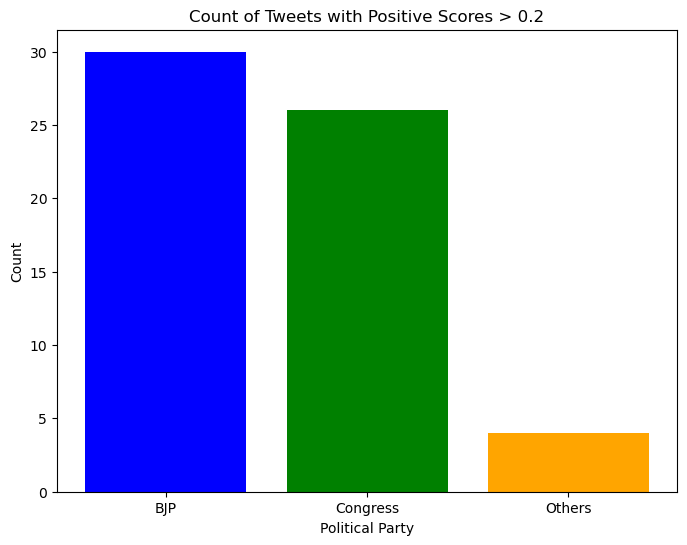

In [98]:
# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(['BJP', 'Congress', 'Others'], [bjp_count, congress_count, others_count], color=['blue', 'green', 'orange'])
plt.title('Count of Tweets with Positive Scores > 0.2')
plt.xlabel('Political Party')
plt.ylabel('Count')
plt.show()